In [1]:
from __future__ import print_function, division

In [2]:
# Standard imports for data analysis packages in Python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Limit rows displayed in notebook
pd.set_option('display.max_rows', 10)
pd.set_option('display.precision', 2)

### Titanic Dataset - Kaggle Training Data

Today, we are going to Predict Whether a Passenger will Survive or not, given other attributes

In [3]:
# Let's explore Titanic Dataset - Read in the Train Dataset
titanic = pd.read_csv('../data/train.csv')

In [4]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Identify Features we want in our Model

* Pclass
* Sex
* Age
* Sibling Count

## Visualizations

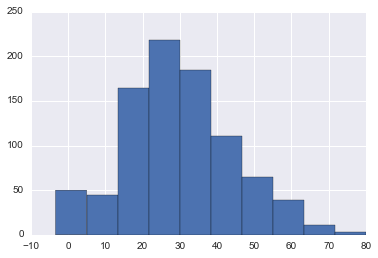

In [104]:
# Age Histogram
titanic.Age.hist()

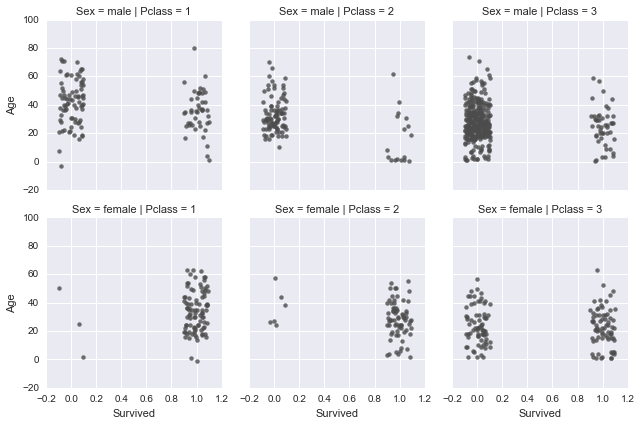

In [102]:
# Plot how many survived, by gender and class
grid_plot = sns.FacetGrid(titanic, row='Sex', col='Pclass')
grid_plot.map(sns.regplot, 'Survived', 'Age',color='.3', fit_reg=False, x_jitter=.1)

### Pclass - Significant?

In [100]:
titanic.groupby('Pclass').Survived.sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [6]:
survived_by_class = titanic.groupby('Pclass').Survived.agg(['sum', 'count'])
survived_by_class['survival_rate'] = survived_by_class['sum'] / survived_by_class['count']
survived_by_class

,sum,count,survival_rate
Pclass,,,
1,136,216,0.63
2,87,184,0.47
3,119,491,0.24


### Gender Significant?

In [7]:
# Your Turn - Plot or see in Table

### Age - Significant?

In [8]:
# Your Turn - Is it?

#### Imputing Values - AGE

In [13]:
# Let's Look at Distribution of Age
# Your Turn - Use hist function on age

In [14]:
# Now, do the Age Distribution by Sex
# Your Turn - use hist, but pass a argument by=titanic['Sex']

In [15]:
# They may look the same, but y-axis is not the same
# Your Turn - Do the same plot, but pass a second parameter to share the Y-Axis (sharey=True)

In [16]:
# Let's populate the missing Age from a Normal Distribution centered on Average Age and Standard Deviation

In [18]:
# Create a Normal Distribution centered on Mean of 29.7 and Standard Dev of 14.5
# Get 117 Entries since that's how many missing entries we have for Age
def get_age_impute_values(n):
    return np.random.normal(29.7, 14.5, n)

In [19]:
# When we look for entries that are null we can create a mask or boolean filter
age_missing_mask = titanic.Age.isnull()
age_missing_mask

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, dtype: bool

In [20]:
# Notice that we have 177 rows that have missing Age field
titanic[age_missing_mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.00,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.22,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.22,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.88,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.23,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.50,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.90,NaN,S


In [21]:
# How do we set the values for Age?

In [22]:
# Now we can set these values to the values we picked from Random Normal Distribution
titanic.loc[titanic.Age.isnull(), 'Age'] = get_age_impute_values(n=177)

In [23]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [25]:
titanic['Pclass'] = titanic.Pclass.astype(str)

### Age Significant?

In [26]:
# 

### KNN Model

In [65]:
X_data = titanic[['Pclass', 'Sex', 'Age', 'SibSp']]

In [66]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Pclass    891 non-null object
Sex       891 non-null object
Age       891 non-null float64
SibSp     891 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 27.9+ KB


In [67]:
X_data = pd.get_dummies(X_data)

In [68]:
y_data = titanic['Survived']

In [69]:
X_data

,Age,SibSp,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,22.00,1,0,0,1,0,1
1,38.00,1,1,0,0,1,0
2,26.00,0,0,0,1,1,0
3,35.00,1,1,0,0,1,0
4,35.00,0,0,0,1,0,1
...,...,...,...,...,...,...,...
886,27.00,0,0,1,0,0,1
887,19.00,0,1,0,0,1,0
888,10.35,1,0,0,1,1,0
889,26.00,0,1,0,0,0,1


In [95]:
try:
    from sklearn.model_selection import train_test_split
except:
    from sklearn.cross_validation import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=12, test_size=0.2)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
clf = KNeighborsClassifier()

In [72]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [73]:
clf.score(X_test, y_test)

0.73743016759776536

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

In [75]:
y_pred = clf.predict(X_test)

In [76]:
# Confusion Matrix for Type 1 and Type 2 Error
confusion_matrix(y_test, y_pred)

array([[88, 12],
       [35, 44]])

In [77]:
# Examine Precision and Recall
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.72      0.88      0.79       100
          1       0.79      0.56      0.65        79

avg / total       0.75      0.74      0.73       179



### Submitting to Kaggle

* Get the NEW Data from Kaggle that we need to Predict
* Impute the same way we did the Training Data
* Make Prediction using the same Classifer Object
* Build a CSV and upload to Kaggle
* Check the Leaderboard and Tweet yay!

In [80]:
titanic_new = pd.read_csv('../data/test.csv')

In [81]:
titanic_new.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.66,NaN,S


In [82]:
# Notice that there's NO "Survived" Column.  That's what we need to Predict
titanic_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [83]:
age_missing_mask = titanic_new.Age.isnull()
print(sum(age_missing_mask))

86


In [84]:
titanic_new.loc[age_missing_mask, 'Age'] = get_age_impute_values(86)

In [85]:
# Convert the Passenger class to Categroical Variable
titanic_new['Pclass'] = titanic_new.Pclass.astype(str)

In [86]:
X_new = titanic_new[['Pclass', 'Sex', 'Age', 'SibSp']]

In [87]:
X_new = pd.get_dummies(X_new)

In [88]:
X_new

,Age,SibSp,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,34.50,0,0,0,1,0,1
1,47.00,1,0,0,1,1,0
2,62.00,0,0,1,0,0,1
3,27.00,0,0,0,1,0,1
4,22.00,1,0,0,1,1,0
...,...,...,...,...,...,...,...
413,55.17,0,0,0,1,0,1
414,39.00,0,1,0,0,1,0
415,38.50,0,0,0,1,0,1
416,45.38,0,0,0,1,0,1


In [89]:
y_pred_new = clf.predict(X_new)

In [90]:
submission = pd.DataFrame({'PassengerId': titanic_new.PassengerId,
                          'Survived': y_pred_new
                          })

In [91]:
submission.head(4)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0


In [92]:
# We don't want the Index row numbers in submission
submission.to_csv('../submissions/submission_1.csv', index=False)